ANÁLISIS EXPLORATORIO DE LOS DATOS

Para el armado del sistema de recomendación, he decido utilizar el filtro colaborativo. El mismo basa su recomendación teniendo en cuenta las similitudes existentes entre los usuarios. Es por este motivo que trabajaré unicamente con los campos "userId", "score" y "id" del dataset ya limpio, llamado "completo.csv"

In [3]:
# Importo las librerías a utilizar 
import pandas as pd
import matplotlib.pyplot as plt 

In [5]:
#Realizo la ingesta del csv
df = pd.read_csv ("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/PrimerPI/Datasets/completo.csv")

C:\Users\Administrador\AppData\Local\Temp\ipykernel_856\1791085826.py:2: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/PrimerPI/Datasets/completo.csv")


In [6]:
df.head ()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,plataforma,duration_int,duration_type,userId,score,timestamp
0,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,543,5.0,2003-07-30
1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,595,3.0,1996-08-13
2,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,611,3.0,2001-01-03
3,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,2523,3.5,2012-06-25
4,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3082,4.0,2000-03-30


In [7]:
#Elimino valores duplicados
df.drop_duplicates (inplace = True)

In [8]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11013875 entries, 0 to 11024288
Data columns (total 17 columns):
 #   Column         Dtype  
---  ------         -----  
 0   type           object 
 1   title          object 
 2   director       object 
 3   cast           object 
 4   country        object 
 5   date_added     object 
 6   release_year   int64  
 7   rating         object 
 8   listed_in      object 
 9   description    object 
 10  id             object 
 11  plataforma     object 
 12  duration_int   float64
 13  duration_type  object 
 14  userId         int64  
 15  score          float64
 16  timestamp      object 
dtypes: float64(2), int64(2), object(13)
memory usage: 1.5+ GB


In [9]:
# Me quedo con las columnas que voy a utilizar 
df_score= df.loc[:, ["userId", "score", "id"]]

In [10]:
df_score.head ()

,userId,score,id
0,543,5.0,as1
1,595,3.0,as1
2,611,3.0,as1
3,2523,3.5,as1
4,3082,4.0,as1


In [11]:
# Para saber a que pelicula corresponde cada calificación, creo un dataframe con dicha información
df_titles= df.loc [:, ["id", "title"]]
df_titles.drop_duplicates (inplace =True) # Elimino los duplicados para posteriormente saber cuantos titulos hay.

In [12]:
df_titles.head ()

,id,title
0,as1,the grand seduction
502,as2,take care good night
995,as3,secrets of deception
1417,as4,pink: staying true
1890,as5,monster maker


In [13]:
# Cantidad de usuarios distintos
print(len(df_score['userId'].unique()))

115077


In [14]:
#Cantidad de peliculas distintas
df_titles.shape

(22998, 2)

In [15]:
# Determinamos el score  de películas por usuario

df_by_users = df_score.groupby(['userId']).count()
df_by_users.head()

,score,id
userId,,
1,27,27
2,22,22
3,10,10
4,62,62
5,26,26


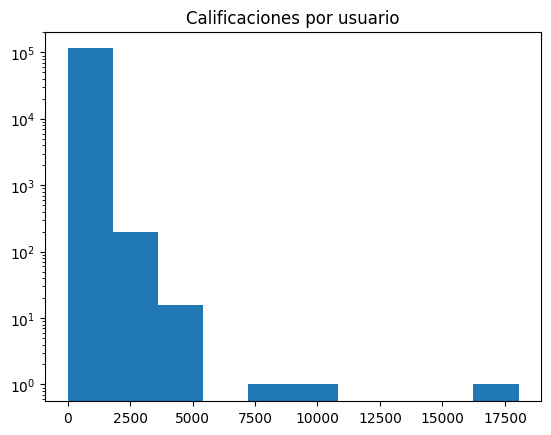

In [16]:
# Distribución de scores por usuario (Se puede observar que la mayoria de los usuarios calificó de entre 0 y 2500 títulos)
plt.hist(df_by_users.score, log= True)
plt.title('Calificaciones por usuario')
plt.show()

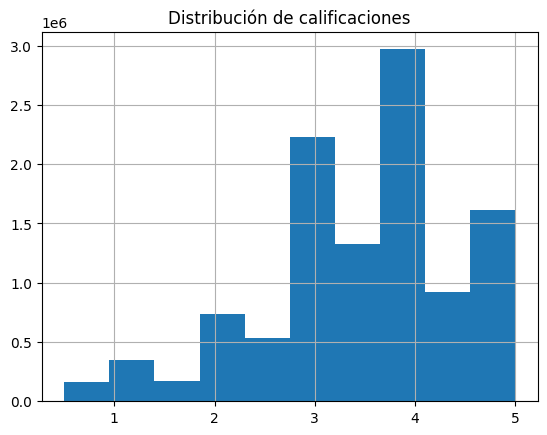

In [17]:
#Distribución de las calificaciones (Podemos observar que las calificaciones mas utilizadas fueron 3 y 4)
df_score['score'].hist()
plt.title('Distribución de calificaciones')
plt.show()

In [22]:
#Peliculas con mas calificaciones
df_by_movies = df_score.groupby(['id']).count()
df_by_movies = df_by_movies.sort_values(by="score", ascending=False)
df_by_movies.head()

,userId,score
id,,
as4197,575,575
as9065,560,560
ns7279,558,558
as848,557,557
hs2360,556,556


In [23]:
df_titles[df_titles["id"] == 'as4197']

,id,title
2012334,as4197,from other worlds


In [24]:
# Peliculas con menos calificaciones
df_by_movies = df_by_movies.sort_values(by="score", ascending=True)
df_by_movies.head()

,userId,score
id,,
as4940,396,396
ns2144,399,399
hs1711,401,401
ns6535,402,402
hs599,404,404


In [25]:
df_titles[df_titles["id"] == 'as4990']

,id,title
2391962,as4990,cruising the cut


In [28]:
# Películasa por popularidad
df_by_movies_pop = df_score.groupby(['id']).count()
df_by_movies_pop.sort_values('userId', ascending = False, inplace = True)
df_by_movies_pop['Vistos'] = df_by_movies['userId']
df_by_movies_pop.drop(columns = ['userId','score'], inplace = True)
df_by_movies_pop.head(10)

,Vistos
id,
as4197,575
as9065,560
ns7279,558
as848,557
hs2360,556
as6998,555
hs582,554
as4889,554
as9469,553


In [29]:
df_titles.head(3)

,id,title
0,as1,the grand seduction
502,as2,take care good night
995,as3,secrets of deception


In [34]:
df_by_movies_pop = df_by_movies_pop.join(df_titles.set_index('id'), on='id', how='inner')


In [37]:
df_by_movies_pop.drop (["Titulo"], inplace = True, axis =1)

In [38]:
df_by_movies_pop.head ()

,Vistos,title
id,,
as4197,575,from other worlds
as9065,560,the organization
ns7279,558,"leapfrog: sing-along, read-along"
as848,557,superbook
hs2360,556,dietland


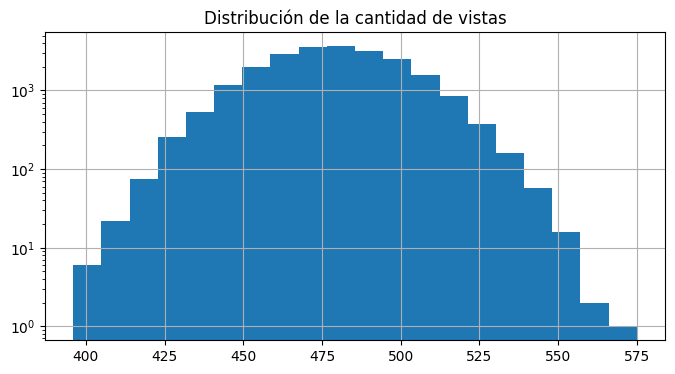

In [39]:
# Distribución de las películas por popularidad
plt.figure(figsize = (8,4))

df_by_movies_pop.Vistos[df_by_movies_pop.Vistos<1000].hist(log = True, bins = 20)
plt.title('Distribución de la cantidad de vistas')

plt.show()

Exporto los 2 csv que voy a utilizar para el modelo de machine learning

In [49]:
df_score.to_csv("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/PrimerPI/ML/score.csv", index=False)

In [50]:
df_titles.to_csv("C:/Users/Administrador/Desktop/Henry/Labs/Proyectosindividuales/PrimerPI/ML/titles.csv", index=False)